In [ ]:
#insert ClaimBuster API key here
KEY=""

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import requests
import json
import seaborn as sns

notes_file = '../data/notes-00000.tsv'
ratings_file = '../data/ratings-00000.tsv'
hydrated_file = '../data/idtweetVALUES.jsonl'

In [2]:
notes_df = pd.read_csv(notes_file, delimiter='\t')
hydrated_Tweets=pd.read_json(hydrated_file, lines=True)
BW = pd.merge(notes_df, hydrated_Tweets, left_on='tweetId', right_on='id')
BW=BW.drop_duplicates(subset='tweetId')

In [3]:
CR=pd.read_json('../data/UpdatedClaimReview/2022_01_14/claim_reviews.json')
CR['joined_text']=CR.claim_text.apply(lambda x: " ".join(x))
CR=CR[CR.joined_text!='']
CR=CR.drop_duplicates(subset='joined_text')

In [ ]:

api_key = KEY
all_BW=[]
for index,row in tqdm(BW.iloc[:].iterrows()):
    input_claim = row.full_text
    api_endpoint = f"https://idir.uta.edu/claimbuster/api/v2/score/text/{input_claim}"
    request_headers = {"x-api-key": api_key}
    api_response = requests.get(url=api_endpoint, headers=request_headers)


    answer = api_response.json()
    results=answer['results']
    score=np.mean([x['score'] for x in answer['results']])
    all_BW.append(score)
    

In [47]:
for index,row in tqdm(BW.iloc[10080:].iterrows()):
    input_claim = row.full_text
    api_endpoint = f"https://idir.uta.edu/claimbuster/api/v2/score/text/{input_claim}"
    request_headers = {"x-api-key": api_key}
    api_response = requests.get(url=api_endpoint, headers=request_headers)
    answer = api_response.json()
    results=answer['results']
    score=np.mean([x['score'] for x in answer['results']])
    all_BW.append(score)




0it [00:00, ?it/s]


1it [00:00,  1.06it/s]


2it [00:01,  1.10it/s]


3it [00:02,  1.10it/s]


4it [00:03,  1.13it/s]


5it [00:04,  1.08it/s]


6it [00:05,  1.08it/s]


7it [00:06,  1.12it/s]


8it [00:07,  1.04it/s]


9it [00:08,  1.09it/s]


10it [00:09,  1.14it/s]


11it [00:09,  1.18it/s]


12it [00:10,  1.15it/s]


13it [00:11,  1.14it/s]


14it [00:12,  1.20it/s]


15it [00:13,  1.21it/s]


16it [00:14,  1.13it/s]


17it [00:15,  1.08it/s]


18it [00:16,  1.12it/s]


19it [00:16,  1.14it/s]


20it [00:17,  1.13it/s]


21it [00:18,  1.19it/s]


22it [00:19,  1.16it/s]


23it [00:20,  1.26it/s]


24it [00:20,  1.21it/s]


25it [00:22,  1.06it/s]


26it [00:22,  1.11it/s]


27it [00:23,  1.17it/s]


28it [00:24,  1.14it/s]


29it [00:25,  1.17it/s]


30it [00:26,  1.18it/s]


31it [00:27,  1.19it/s]


32it [00:27,  1.20it/s]


33it [00:28,  1.19it/s]


34it [00:29,  1.12it/s]


35it [00:30,  1.12it/s]


36it [00:31,  1.19it/s]


37it [00:32,  1.20it/s]


38it [00:32,  1.25it/s]

In [49]:
len(BW)

10211

In [56]:
from random import sample

In [63]:
CR_sample=CR.sample(len(CR))

In [64]:

api_key = KEY
all_CR=[]
for index,row in tqdm(CR_sample.iloc[:].iterrows()):
    input_claim = row.joined_text
    api_endpoint = f"https://idir.uta.edu/claimbuster/api/v2/score/text/{input_claim}"
    request_headers = {"x-api-key": api_key}
    api_response = requests.get(url=api_endpoint, headers=request_headers)

    # Print out the JSON payload the API sent back
    answer = api_response.json()
    results=answer['results']
    score=np.mean([x['score'] for x in answer['results']])
    all_CR.append(score)
    




0it [00:00, ?it/s]


1it [00:00,  1.14it/s]


2it [00:01,  1.13it/s]


3it [00:02,  1.07it/s]


4it [00:03,  1.05it/s]


5it [00:04,  1.13it/s]


6it [00:05,  1.02it/s]


7it [00:06,  1.07it/s]


8it [00:07,  1.11it/s]


9it [00:08,  1.18it/s]


10it [00:08,  1.24it/s]


11it [00:09,  1.23it/s]


12it [00:10,  1.23it/s]


13it [00:11,  1.14it/s]


14it [00:12,  1.16it/s]


15it [00:13,  1.14it/s]


16it [00:14,  1.09it/s]


17it [00:15,  1.12it/s]


18it [00:15,  1.15it/s]


19it [00:16,  1.17it/s]


20it [00:17,  1.18it/s]


21it [00:18,  1.25it/s]


22it [00:19,  1.15it/s]


23it [00:20,  1.17it/s]


24it [00:21,  1.14it/s]


25it [00:21,  1.21it/s]


26it [00:22,  1.21it/s]


27it [00:23,  1.08it/s]


28it [00:24,  1.13it/s]


29it [00:25,  1.16it/s]


30it [00:26,  1.22it/s]


31it [00:26,  1.22it/s]


32it [00:27,  1.22it/s]


33it [00:28,  1.29it/s]


34it [00:29,  1.17it/s]


35it [00:30,  1.17it/s]


36it [00:30,  1.23it/s]


37it [00:31,  1.23it/s]


38it [00:32,  1.23it/s]

447it [06:09,  1.20it/s]


448it [06:10,  1.21it/s]


449it [06:11,  1.21it/s]


450it [06:12,  1.22it/s]


451it [06:12,  1.22it/s]


452it [06:13,  1.22it/s]


453it [06:14,  1.18it/s]


454it [06:15,  1.19it/s]


455it [06:16,  1.20it/s]


456it [06:17,  1.12it/s]


457it [06:18,  1.19it/s]


458it [06:18,  1.24it/s]


459it [06:19,  1.19it/s]


460it [06:20,  1.20it/s]


461it [06:21,  1.21it/s]


462it [06:22,  1.25it/s]


463it [06:22,  1.25it/s]


464it [06:23,  1.24it/s]


465it [06:24,  1.21it/s]


466it [06:25,  1.07it/s]


467it [06:26,  1.16it/s]


468it [06:27,  1.17it/s]


469it [06:28,  1.21it/s]


470it [06:28,  1.19it/s]


471it [06:29,  1.17it/s]


472it [06:30,  1.21it/s]


473it [06:31,  1.17it/s]


474it [06:32,  1.20it/s]


475it [06:33,  1.15it/s]


476it [06:34,  1.14it/s]


477it [06:34,  1.24it/s]


478it [06:35,  1.15it/s]


479it [06:36,  1.14it/s]


480it [06:37,  1.11it/s]


481it [06:38,  1.20it/s]


482it [06:39,  1.26it/s]


483it [06:40,  1.14it/s]


4

901it [12:28,  1.25it/s]


902it [12:29,  1.07it/s]


903it [12:30,  1.12it/s]


904it [12:31,  1.14it/s]


905it [12:31,  1.21it/s]


906it [12:32,  1.17it/s]


907it [12:33,  1.20it/s]


908it [12:34,  1.15it/s]


909it [12:35,  1.17it/s]


910it [12:36,  1.19it/s]


911it [12:36,  1.19it/s]


912it [12:37,  1.16it/s]


913it [12:38,  1.22it/s]


914it [12:39,  1.24it/s]


915it [12:40,  1.26it/s]


916it [12:40,  1.25it/s]


917it [12:41,  1.24it/s]


918it [12:42,  1.24it/s]


919it [12:43,  1.18it/s]


920it [12:44,  1.20it/s]


921it [12:45,  1.25it/s]


922it [12:45,  1.29it/s]


923it [12:46,  1.27it/s]


924it [12:47,  1.30it/s]


925it [12:48,  1.30it/s]


926it [12:48,  1.25it/s]


927it [12:49,  1.24it/s]


928it [12:50,  1.28it/s]


929it [12:51,  1.27it/s]


930it [12:52,  1.25it/s]


931it [12:52,  1.24it/s]


932it [12:53,  1.23it/s]


933it [12:54,  1.25it/s]


934it [12:55,  1.18it/s]


935it [12:56,  1.19it/s]


936it [12:57,  1.20it/s]


937it [12:57,  1.23it/s]


9

1346it [18:29,  1.18it/s]


1347it [18:30,  1.19it/s]


1348it [18:31,  1.22it/s]


1349it [18:31,  1.20it/s]


1350it [18:32,  1.21it/s]


1351it [18:33,  1.26it/s]


1352it [18:34,  1.16it/s]


1353it [18:35,  1.18it/s]


1354it [18:36,  1.21it/s]


1355it [18:37,  1.11it/s]


1356it [18:37,  1.15it/s]


1357it [18:38,  1.21it/s]


1358it [18:39,  1.17it/s]


1359it [18:40,  1.18it/s]


1360it [18:41,  1.20it/s]


1361it [18:42,  1.20it/s]


1362it [18:42,  1.20it/s]


1363it [18:43,  1.26it/s]


1364it [18:44,  1.25it/s]


1365it [18:45,  1.26it/s]


1366it [18:45,  1.30it/s]


1367it [18:47,  1.05it/s]


1368it [18:47,  1.15it/s]


1369it [18:48,  1.23it/s]


1370it [18:49,  1.24it/s]


1371it [18:50,  1.23it/s]


1372it [18:51,  1.23it/s]


1373it [18:51,  1.23it/s]


1374it [18:52,  1.23it/s]


1375it [18:53,  1.22it/s]


1376it [18:54,  1.24it/s]


1377it [18:55,  1.28it/s]


1378it [18:55,  1.25it/s]


1379it [18:56,  1.29it/s]


1380it [18:57,  1.22it/s]


1381it [18:58,  1.26

1788it [24:31,  1.17it/s]


1789it [24:32,  1.18it/s]


1790it [24:33,  1.24it/s]


1791it [24:34,  1.23it/s]


1792it [24:35,  1.15it/s]


1793it [24:36,  1.12it/s]


1794it [24:37,  1.15it/s]


1795it [24:37,  1.22it/s]


1796it [24:38,  1.30it/s]


1797it [24:39,  1.24it/s]


1798it [24:40,  1.19it/s]


1799it [24:41,  1.20it/s]


1800it [24:41,  1.21it/s]


1801it [24:42,  1.21it/s]


1802it [24:43,  1.21it/s]


1803it [24:44,  1.21it/s]


1804it [24:45,  1.22it/s]


1805it [24:45,  1.22it/s]


1806it [24:46,  1.22it/s]


1807it [24:47,  1.22it/s]


1808it [24:48,  1.28it/s]


1809it [24:49,  1.30it/s]


1810it [24:49,  1.33it/s]


1811it [24:50,  1.24it/s]


1812it [24:51,  1.24it/s]


1813it [24:52,  1.23it/s]


1814it [24:53,  1.23it/s]


1815it [24:53,  1.23it/s]


1816it [24:54,  1.22it/s]


1817it [24:55,  1.22it/s]


1818it [24:56,  1.27it/s]


1819it [24:57,  1.25it/s]


1820it [24:57,  1.25it/s]


1821it [24:58,  1.28it/s]


1822it [24:59,  1.22it/s]


1823it [25:00,  1.17

2230it [30:32,  1.22it/s]


2231it [30:33,  1.20it/s]


2232it [30:34,  1.20it/s]


2233it [30:35,  1.24it/s]


2234it [30:35,  1.24it/s]


2235it [30:36,  1.24it/s]


2236it [30:37,  1.23it/s]


2237it [30:38,  1.28it/s]


2238it [30:39,  1.21it/s]


2239it [30:39,  1.22it/s]


2240it [30:40,  1.22it/s]


2241it [30:41,  1.22it/s]


2242it [30:42,  1.13it/s]


2243it [30:43,  1.18it/s]


2244it [30:44,  1.22it/s]


2245it [30:44,  1.21it/s]


2246it [30:45,  1.23it/s]


2247it [30:46,  1.19it/s]


2248it [30:47,  1.24it/s]


2249it [30:48,  1.26it/s]


2250it [30:48,  1.32it/s]


2251it [30:49,  1.27it/s]


2252it [30:50,  1.16it/s]


2253it [30:51,  1.18it/s]


2254it [30:52,  1.24it/s]


2255it [30:53,  1.23it/s]


2256it [30:53,  1.23it/s]


2257it [30:54,  1.23it/s]


2258it [30:55,  1.27it/s]


2259it [30:56,  1.26it/s]


2260it [30:57,  1.24it/s]


2261it [30:57,  1.30it/s]


2262it [30:58,  1.37it/s]


2263it [30:59,  1.38it/s]


2264it [31:00,  1.18it/s]


2265it [31:01,  1.17

2672it [36:26,  1.24it/s]


2673it [36:27,  1.24it/s]


2674it [36:28,  1.33it/s]


2675it [36:29,  1.35it/s]


2676it [36:29,  1.31it/s]


2677it [36:30,  1.28it/s]


2678it [36:31,  1.26it/s]


2679it [36:32,  1.25it/s]


2680it [36:33,  1.24it/s]


2681it [36:33,  1.28it/s]


2682it [36:34,  1.31it/s]


2683it [36:35,  1.19it/s]


2684it [36:36,  1.19it/s]


2685it [36:37,  1.18it/s]


2686it [36:38,  1.16it/s]


2687it [36:38,  1.19it/s]


2688it [36:39,  1.22it/s]


2689it [36:40,  1.22it/s]


2690it [36:41,  1.16it/s]


2691it [36:42,  1.14it/s]


2692it [36:43,  1.08it/s]


2693it [36:44,  1.12it/s]


2694it [36:44,  1.21it/s]


2695it [36:45,  1.20it/s]


2696it [36:46,  1.25it/s]


2697it [36:47,  1.21it/s]


2698it [36:48,  1.30it/s]


2699it [36:48,  1.34it/s]


2700it [36:49,  1.24it/s]


2701it [36:50,  1.23it/s]


2702it [36:51,  1.23it/s]


2703it [36:52,  1.18it/s]


2704it [36:53,  1.19it/s]


2705it [36:54,  1.12it/s]


2706it [36:54,  1.16it/s]


2707it [36:55,  1.26

3114it [42:26,  1.23it/s]


3115it [42:27,  1.21it/s]


3116it [42:27,  1.26it/s]


3117it [42:28,  1.34it/s]


3118it [42:29,  1.17it/s]


3119it [42:30,  1.19it/s]


3120it [42:31,  1.20it/s]


3121it [42:32,  1.20it/s]


3122it [42:32,  1.21it/s]


3123it [42:33,  1.23it/s]


3124it [42:34,  1.21it/s]


3125it [42:35,  1.26it/s]


3126it [42:36,  1.25it/s]


3127it [42:36,  1.33it/s]


3128it [42:37,  1.39it/s]


3129it [42:37,  1.45it/s]


3130it [42:38,  1.45it/s]


3131it [42:39,  1.48it/s]


3132it [42:39,  1.46it/s]


3133it [42:40,  1.49it/s]


3134it [42:41,  1.53it/s]


3135it [42:41,  1.50it/s]


3136it [42:42,  1.44it/s]


3137it [42:43,  1.43it/s]


3138it [42:44,  1.36it/s]


3139it [42:45,  1.32it/s]


3140it [42:45,  1.25it/s]


3141it [42:46,  1.22it/s]


3142it [42:47,  1.24it/s]


3143it [42:48,  1.23it/s]


3144it [42:49,  1.22it/s]


3145it [42:50,  1.17it/s]


3146it [42:51,  1.10it/s]


3147it [42:52,  1.14it/s]


3148it [42:52,  1.16it/s]


3149it [42:53,  1.18

3556it [48:19,  1.19it/s]


3557it [48:20,  1.20it/s]


3558it [48:21,  1.21it/s]


3559it [48:21,  1.26it/s]


3560it [48:22,  1.16it/s]


3561it [48:23,  1.18it/s]


3562it [48:24,  1.19it/s]


3563it [48:25,  1.24it/s]


3564it [48:26,  1.24it/s]


3565it [48:27,  1.15it/s]


3566it [48:27,  1.17it/s]


3567it [48:28,  1.26it/s]


3568it [48:29,  1.13it/s]


3569it [48:30,  1.16it/s]


3570it [48:31,  1.19it/s]


3571it [48:32,  1.18it/s]


3572it [48:33,  1.15it/s]


3573it [48:33,  1.13it/s]


3574it [48:34,  1.21it/s]


3575it [48:35,  1.22it/s]


3576it [48:36,  1.30it/s]


3577it [48:36,  1.35it/s]


3578it [48:37,  1.39it/s]


3579it [48:38,  1.46it/s]


3580it [48:38,  1.49it/s]


3581it [48:39,  1.48it/s]


3582it [48:40,  1.48it/s]


3583it [48:40,  1.52it/s]


3584it [48:41,  1.48it/s]


3585it [48:42,  1.37it/s]


3586it [48:42,  1.44it/s]


3587it [48:43,  1.47it/s]


3588it [48:44,  1.35it/s]


3589it [48:45,  1.30it/s]


3590it [48:45,  1.33it/s]


3591it [48:46,  1.35

3998it [54:18,  1.31it/s]


3999it [54:19,  1.16it/s]


4000it [54:20,  1.20it/s]


4001it [54:21,  1.11it/s]


4002it [54:22,  1.14it/s]


4003it [54:23,  1.16it/s]


4004it [54:23,  1.18it/s]


4005it [54:24,  1.15it/s]


4006it [54:25,  1.09it/s]


4007it [54:26,  1.17it/s]


4008it [54:27,  1.18it/s]


4009it [54:28,  1.19it/s]


4010it [54:28,  1.25it/s]


4011it [54:29,  1.24it/s]


4012it [54:30,  1.18it/s]


4013it [54:31,  1.20it/s]


4014it [54:32,  1.22it/s]


4015it [54:33,  1.21it/s]


4016it [54:33,  1.27it/s]


4017it [54:34,  1.29it/s]


4018it [54:35,  1.32it/s]


4019it [54:36,  1.29it/s]


4020it [54:36,  1.27it/s]


4021it [54:37,  1.30it/s]


4022it [54:38,  1.32it/s]


4023it [54:39,  1.30it/s]


4024it [54:39,  1.28it/s]


4025it [54:40,  1.26it/s]


4026it [54:41,  1.25it/s]


4027it [54:42,  1.15it/s]


4028it [54:43,  1.17it/s]


4029it [54:44,  1.12it/s]


4030it [54:45,  1.13it/s]


4031it [54:45,  1.20it/s]


4032it [54:46,  1.21it/s]


4033it [54:47,  1.21

4438it [1:00:24,  1.03it/s]


4439it [1:00:25,  1.08it/s]


4440it [1:00:25,  1.18it/s]


4441it [1:00:26,  1.17it/s]


4442it [1:00:27,  1.20it/s]


4443it [1:00:28,  1.19it/s]


4444it [1:00:29,  1.14it/s]


4445it [1:00:30,  1.18it/s]


4446it [1:00:31,  1.19it/s]


4447it [1:00:31,  1.19it/s]


4448it [1:00:32,  1.22it/s]


4449it [1:00:33,  1.21it/s]


4450it [1:00:34,  1.11it/s]


4451it [1:00:35,  1.12it/s]


4452it [1:00:36,  1.12it/s]


4453it [1:00:37,  1.14it/s]


4454it [1:00:38,  1.08it/s]


4455it [1:00:38,  1.16it/s]


4456it [1:00:39,  1.14it/s]


4457it [1:00:40,  1.16it/s]


4458it [1:00:41,  1.13it/s]


4459it [1:00:42,  1.18it/s]


4460it [1:00:43,  1.22it/s]


4461it [1:00:43,  1.29it/s]


4462it [1:00:44,  1.20it/s]


4463it [1:00:45,  1.27it/s]


4464it [1:00:46,  1.24it/s]


4465it [1:00:47,  1.25it/s]


4466it [1:00:48,  1.14it/s]


4467it [1:00:48,  1.20it/s]


4468it [1:00:49,  1.21it/s]


4469it [1:00:50,  1.20it/s]


4470it [1:00:51,  1.22it/s]


4471it [1:

4858it [1:06:14,  1.21it/s]


4859it [1:06:15,  1.21it/s]


4860it [1:06:15,  1.25it/s]


4861it [1:06:16,  1.24it/s]


4862it [1:06:17,  1.28it/s]


4863it [1:06:18,  1.26it/s]


4864it [1:06:19,  1.20it/s]


4865it [1:06:20,  1.21it/s]


4866it [1:06:20,  1.17it/s]


4867it [1:06:21,  1.19it/s]


4868it [1:06:22,  1.21it/s]


4869it [1:06:23,  1.02it/s]


4870it [1:06:24,  1.01it/s]


4871it [1:06:25,  1.06it/s]


4872it [1:06:26,  1.06it/s]


4873it [1:06:27,  1.10it/s]


4874it [1:06:28,  1.18it/s]


4875it [1:06:29,  1.11it/s]


4876it [1:06:30,  1.14it/s]


4877it [1:06:30,  1.17it/s]


4878it [1:06:32,  1.10s/it]


4879it [1:06:33,  1.01s/it]


4880it [1:06:34,  1.01s/it]


4881it [1:06:35,  1.02it/s]


4882it [1:06:36,  1.07it/s]


4883it [1:06:36,  1.16it/s]


4884it [1:06:37,  1.12it/s]


4885it [1:06:38,  1.15it/s]


4886it [1:06:39,  1.17it/s]


4887it [1:06:40,  1.15it/s]


4888it [1:06:41,  1.17it/s]


4889it [1:06:42,  1.14it/s]


4890it [1:06:42,  1.21it/s]


4891it [1:

5278it [1:12:18,  1.11it/s]


5279it [1:12:19,  1.14it/s]


5280it [1:12:20,  1.09it/s]


5281it [1:12:21,  1.10it/s]


5282it [1:12:22,  1.16it/s]


5283it [1:12:23,  1.10it/s]


5284it [1:12:24,  1.09it/s]


5285it [1:12:24,  1.13it/s]


5286it [1:12:26,  1.01it/s]


5287it [1:12:27,  1.07it/s]


5288it [1:12:27,  1.15it/s]


5289it [1:12:28,  1.01it/s]


5290it [1:12:30,  1.02s/it]


5291it [1:12:30,  1.04it/s]


5292it [1:12:31,  1.05it/s]


5293it [1:12:32,  1.10it/s]


5294it [1:12:33,  1.16it/s]


5295it [1:12:34,  1.19it/s]


5296it [1:12:34,  1.24it/s]


5297it [1:12:35,  1.24it/s]


5298it [1:12:36,  1.25it/s]


5299it [1:12:37,  1.14it/s]


5300it [1:12:38,  1.17it/s]


5301it [1:12:39,  1.22it/s]


5302it [1:12:40,  1.13it/s]


5303it [1:12:40,  1.16it/s]


5304it [1:12:41,  1.18it/s]


5305it [1:12:42,  1.15it/s]


5306it [1:12:43,  1.20it/s]


5307it [1:12:44,  1.14it/s]


5308it [1:12:45,  1.15it/s]


5309it [1:12:46,  1.13it/s]


5310it [1:12:46,  1.16it/s]


5311it [1:

5698it [1:18:19,  1.48it/s]


5699it [1:18:19,  1.52it/s]


5700it [1:18:20,  1.40it/s]


5701it [1:18:21,  1.29it/s]


5702it [1:18:22,  1.33it/s]


5703it [1:18:23,  1.35it/s]


5704it [1:18:23,  1.29it/s]


5705it [1:18:24,  1.27it/s]


5706it [1:18:25,  1.17it/s]


5707it [1:18:26,  1.23it/s]


5708it [1:18:27,  1.22it/s]


5709it [1:18:28,  1.22it/s]


5710it [1:18:28,  1.24it/s]


5711it [1:18:29,  1.17it/s]


5712it [1:18:30,  1.11it/s]


5713it [1:18:31,  1.13it/s]


5714it [1:18:32,  1.17it/s]


5715it [1:18:33,  1.20it/s]


5716it [1:18:34,  1.19it/s]


5717it [1:18:35,  1.20it/s]


5718it [1:18:35,  1.25it/s]


5719it [1:18:36,  1.30it/s]


5720it [1:18:37,  1.32it/s]


5721it [1:18:37,  1.33it/s]


5722it [1:18:38,  1.36it/s]


5723it [1:18:39,  1.31it/s]


5724it [1:18:40,  1.19it/s]


5725it [1:18:41,  1.21it/s]


5726it [1:18:42,  1.22it/s]


5727it [1:18:43,  1.12it/s]


5728it [1:18:43,  1.15it/s]


5729it [1:18:44,  1.17it/s]


5730it [1:18:45,  1.14it/s]


5731it [1:

6118it [1:24:04,  1.14it/s]


6119it [1:24:05,  1.12it/s]


6120it [1:24:06,  1.08it/s]


6121it [1:24:07,  1.12it/s]


6122it [1:24:07,  1.15it/s]


6123it [1:24:08,  1.17it/s]


6124it [1:24:09,  1.10it/s]


6125it [1:24:10,  1.13it/s]


6126it [1:24:11,  1.16it/s]


6127it [1:24:12,  1.10it/s]


6128it [1:24:13,  1.09it/s]


6129it [1:24:14,  1.13it/s]


6130it [1:24:14,  1.17it/s]


6131it [1:24:15,  1.18it/s]


6132it [1:24:16,  1.18it/s]


6133it [1:24:17,  1.19it/s]


6134it [1:24:18,  1.12it/s]


6135it [1:24:19,  1.15it/s]


6136it [1:24:20,  1.17it/s]


6137it [1:24:21,  1.10it/s]


6138it [1:24:21,  1.14it/s]


6139it [1:24:22,  1.18it/s]


6140it [1:24:23,  1.17it/s]


6141it [1:24:24,  1.19it/s]


6142it [1:24:25,  1.15it/s]


6143it [1:24:26,  1.13it/s]


6144it [1:24:26,  1.20it/s]


6145it [1:24:27,  1.21it/s]


6146it [1:24:28,  1.13it/s]


6147it [1:24:29,  1.13it/s]


6148it [1:24:30,  1.14it/s]


6149it [1:24:31,  1.16it/s]


6150it [1:24:31,  1.23it/s]


6151it [1:

6538it [1:29:42,  1.15it/s]


6539it [1:29:43,  1.13it/s]


6540it [1:29:44,  1.10it/s]


6541it [1:29:45,  1.14it/s]


6542it [1:29:45,  1.24it/s]


6543it [1:29:46,  1.24it/s]


6544it [1:29:47,  1.24it/s]


6545it [1:29:48,  1.16it/s]


6546it [1:29:49,  1.09it/s]


6547it [1:29:50,  1.17it/s]


6548it [1:29:50,  1.22it/s]


6549it [1:29:51,  1.27it/s]


6550it [1:29:52,  1.25it/s]


6551it [1:29:53,  1.20it/s]


6552it [1:29:54,  1.08it/s]


6553it [1:29:55,  1.18it/s]


6554it [1:29:55,  1.26it/s]


6555it [1:29:56,  1.25it/s]


6556it [1:29:57,  1.30it/s]


6557it [1:29:58,  1.29it/s]


6558it [1:29:58,  1.32it/s]


6559it [1:29:59,  1.13it/s]


6560it [1:30:00,  1.19it/s]


6561it [1:30:01,  1.25it/s]


6562it [1:30:02,  1.25it/s]


6563it [1:30:02,  1.29it/s]


6564it [1:30:03,  1.33it/s]


6565it [1:30:04,  1.24it/s]


6566it [1:30:05,  1.23it/s]


6567it [1:30:06,  1.14it/s]


6568it [1:30:07,  1.16it/s]


6569it [1:30:07,  1.26it/s]


6570it [1:30:08,  1.26it/s]


6571it [1:

6958it [1:35:33,  1.36it/s]


6959it [1:35:34,  1.41it/s]


6960it [1:35:35,  1.37it/s]


6961it [1:35:36,  1.18it/s]


6962it [1:35:37,  1.12it/s]


6963it [1:35:37,  1.14it/s]


6964it [1:35:38,  1.16it/s]


6965it [1:35:39,  1.18it/s]


6966it [1:35:40,  1.19it/s]


6967it [1:35:41,  1.16it/s]


6968it [1:35:42,  1.14it/s]


6969it [1:35:42,  1.22it/s]


6970it [1:35:43,  1.27it/s]


6971it [1:35:44,  1.15it/s]


6972it [1:35:45,  1.16it/s]


6973it [1:35:46,  1.23it/s]


6974it [1:35:47,  1.23it/s]


6975it [1:35:47,  1.26it/s]


6976it [1:35:48,  1.27it/s]


6977it [1:35:49,  1.16it/s]


6978it [1:35:50,  1.19it/s]


6979it [1:35:51,  1.18it/s]


6980it [1:35:52,  1.19it/s]


6981it [1:35:52,  1.22it/s]


6982it [1:35:53,  1.18it/s]


6983it [1:35:54,  1.13it/s]


6984it [1:35:55,  1.13it/s]


6985it [1:35:56,  1.14it/s]


6986it [1:35:57,  1.18it/s]


6987it [1:35:58,  1.22it/s]


6988it [1:35:58,  1.19it/s]


6989it [1:36:00,  1.07it/s]


6990it [1:36:00,  1.11it/s]


6991it [1:

7378it [1:41:20,  1.20it/s]


7379it [1:41:21,  1.20it/s]


7380it [1:41:21,  1.21it/s]


7381it [1:41:22,  1.26it/s]


7382it [1:41:23,  1.25it/s]


7383it [1:41:24,  1.24it/s]


7384it [1:41:25,  1.23it/s]


7385it [1:41:26,  1.19it/s]


7386it [1:41:26,  1.20it/s]


7387it [1:41:27,  1.25it/s]


7388it [1:41:28,  1.26it/s]


7389it [1:41:29,  1.18it/s]


7390it [1:41:30,  1.20it/s]


7391it [1:41:30,  1.20it/s]


7392it [1:41:31,  1.17it/s]


7393it [1:41:32,  1.14it/s]


7394it [1:41:33,  1.22it/s]


7395it [1:41:34,  1.25it/s]


7396it [1:41:34,  1.33it/s]


7397it [1:41:35,  1.23it/s]


7398it [1:41:36,  1.21it/s]


7399it [1:41:37,  1.21it/s]


7400it [1:41:38,  1.13it/s]


7401it [1:41:39,  1.16it/s]


7402it [1:41:40,  1.22it/s]


7403it [1:41:40,  1.22it/s]


7404it [1:41:41,  1.22it/s]


7405it [1:41:42,  1.27it/s]


7406it [1:41:43,  1.25it/s]


7407it [1:41:44,  1.11it/s]


7408it [1:41:45,  1.19it/s]


7409it [1:41:45,  1.22it/s]


7410it [1:41:46,  1.11it/s]


7411it [1:

7798it [1:47:15,  1.13it/s]


7799it [1:47:16,  1.14it/s]


7800it [1:47:17,  1.16it/s]


7801it [1:47:18,  1.23it/s]


7802it [1:47:18,  1.30it/s]


7803it [1:47:19,  1.22it/s]


7804it [1:47:20,  1.25it/s]


7805it [1:47:21,  1.31it/s]


7806it [1:47:21,  1.39it/s]


7807it [1:47:22,  1.43it/s]


7808it [1:47:23,  1.48it/s]


7809it [1:47:23,  1.52it/s]


7810it [1:47:24,  1.42it/s]


7811it [1:47:25,  1.35it/s]


7812it [1:47:26,  1.39it/s]


7813it [1:47:27,  1.26it/s]


7814it [1:47:27,  1.26it/s]


7815it [1:47:28,  1.24it/s]


7816it [1:47:29,  1.11it/s]


7817it [1:47:30,  1.14it/s]


7818it [1:47:31,  1.22it/s]


7819it [1:47:31,  1.30it/s]


7820it [1:47:32,  1.35it/s]


7821it [1:47:33,  1.31it/s]


7822it [1:47:34,  1.39it/s]


7823it [1:47:34,  1.38it/s]


7824it [1:47:35,  1.37it/s]


7825it [1:47:36,  1.32it/s]


7826it [1:47:37,  1.29it/s]


7827it [1:47:37,  1.29it/s]


7828it [1:47:39,  1.08it/s]


7829it [1:47:40,  1.08it/s]


7830it [1:47:40,  1.16it/s]


7831it [1:

8218it [1:53:09,  1.09it/s]


8219it [1:53:09,  1.12it/s]


8220it [1:53:10,  1.15it/s]


8221it [1:53:11,  1.17it/s]


8222it [1:53:12,  1.20it/s]


8223it [1:53:13,  1.24it/s]


8224it [1:53:14,  1.15it/s]


8225it [1:53:14,  1.17it/s]


8226it [1:53:15,  1.20it/s]


8227it [1:53:16,  1.19it/s]


8228it [1:53:17,  1.16it/s]


8229it [1:53:18,  1.18it/s]


8230it [1:53:19,  1.19it/s]


8231it [1:53:20,  1.12it/s]


8232it [1:53:21,  1.10it/s]


8233it [1:53:22,  1.10it/s]


8234it [1:53:22,  1.11it/s]


8235it [1:53:23,  1.16it/s]


8236it [1:53:24,  1.14it/s]


8237it [1:53:25,  1.16it/s]


8238it [1:53:26,  1.14it/s]


8239it [1:53:27,  1.16it/s]


8240it [1:53:27,  1.22it/s]


8241it [1:53:28,  1.18it/s]


8242it [1:53:29,  1.15it/s]


8243it [1:53:30,  1.17it/s]


8244it [1:53:31,  1.23it/s]


8245it [1:53:31,  1.28it/s]


8246it [1:53:32,  1.26it/s]


8247it [1:53:33,  1.29it/s]


8248it [1:53:34,  1.32it/s]


8249it [1:53:35,  1.29it/s]


8250it [1:53:35,  1.22it/s]


8251it [1:

ConnectionError: HTTPSConnectionPool(host='idir.uta.edu', port=443): Max retries exceeded with url: /claimbuster/api/v2/score/text/Emmanuel%20Macron%20a-t-il%20dit%20:%20%C2%AB%20Si%20on%20a%20200%20euros%20pour%20des%20cadeaux,%20on%20n%E2%80%99a%20pas%20besoin%20d%E2%80%99une%20augmentation%20%C2%BB%20 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fe6cba8acf8>: Failed to establish a new connection: [Errno -2] Name or service not known',))

In [70]:
for index,row in tqdm(CR_sample.iloc[9222:].iterrows()):
    input_claim = row.joined_text
    api_endpoint = f"https://idir.uta.edu/claimbuster/api/v2/score/text/{input_claim}"
    request_headers = {"x-api-key": api_key}
    api_response = requests.get(url=api_endpoint, headers=request_headers)

    # Print out the JSON payload the API sent back
    answer = api_response.json()
    results=answer['results']
    score=np.mean([x['score'] for x in answer['results']])
    all_CR.append(score)






0it [00:00, ?it/s]




1it [00:01,  1.34s/it]




2it [00:02,  1.24s/it]




3it [00:03,  1.20s/it]




4it [00:04,  1.16s/it]




5it [00:05,  1.16s/it]




6it [00:06,  1.17s/it]




7it [00:07,  1.12s/it]




8it [00:09,  1.13s/it]




9it [00:09,  1.04s/it]




10it [00:10,  1.03it/s]




11it [00:11,  1.05s/it]




12it [00:12,  1.05it/s]




13it [00:13,  1.06it/s]




14it [00:14,  1.03s/it]




15it [00:15,  1.04it/s]




16it [00:16,  1.06it/s]




17it [00:17,  1.07it/s]




18it [00:18,  1.06it/s]




19it [00:19,  1.04it/s]




20it [00:20,  1.12it/s]




21it [00:21,  1.04it/s]




22it [00:22,  1.09it/s]




23it [00:23,  1.01s/it]




24it [00:24,  1.01it/s]




25it [00:25,  1.04it/s]




26it [00:26,  1.02it/s]




27it [00:27,  1.03s/it]




28it [00:27,  1.08it/s]




29it [00:29,  1.04it/s]




30it [00:29,  1.12it/s]




31it [00:30,  1.08it/s]




32it [00:31,  1.04it/s]




33it [00:32,  1.13it/s]




34it [00:33,  1.20it/s]




35it [00:34,  1.18it/s]




3

374it [05:22,  1.18it/s]




375it [05:23,  1.19it/s]




376it [05:24,  1.20it/s]




377it [05:24,  1.22it/s]




378it [05:25,  1.30it/s]




379it [05:26,  1.19it/s]




380it [05:27,  1.19it/s]




381it [05:28,  1.22it/s]




382it [05:29,  1.16it/s]




383it [05:29,  1.22it/s]




384it [05:30,  1.23it/s]




385it [05:31,  1.24it/s]




386it [05:32,  1.13it/s]




387it [05:33,  1.23it/s]




388it [05:33,  1.24it/s]




389it [05:34,  1.28it/s]




390it [05:35,  1.28it/s]




391it [05:36,  1.25it/s]




392it [05:36,  1.31it/s]




393it [05:38,  1.17it/s]




394it [05:38,  1.18it/s]




395it [05:39,  1.11it/s]




396it [05:40,  1.13it/s]




397it [05:41,  1.09it/s]




398it [05:42,  1.13it/s]




399it [05:43,  1.20it/s]




400it [05:43,  1.27it/s]




401it [05:44,  1.23it/s]




402it [05:45,  1.23it/s]




403it [05:46,  1.28it/s]




404it [05:47,  1.17it/s]




405it [05:48,  1.16it/s]




406it [05:49,  1.20it/s]




407it [05:49,  1.23it/s]




408it [05:50, 

746it [10:44,  1.10s/it]




747it [10:45,  1.03s/it]




748it [10:46,  1.08s/it]




749it [10:47,  1.00it/s]




750it [10:48,  1.09it/s]




751it [10:48,  1.14it/s]




752it [10:49,  1.13it/s]




753it [10:50,  1.10it/s]




754it [10:51,  1.13it/s]




755it [10:52,  1.12it/s]




756it [10:53,  1.12it/s]




757it [10:54,  1.06it/s]




758it [10:55,  1.11it/s]




759it [10:56,  1.14it/s]




760it [10:56,  1.16it/s]




761it [10:57,  1.10it/s]




762it [10:58,  1.15it/s]




763it [11:00,  1.05s/it]




764it [11:01,  1.02it/s]




765it [11:01,  1.09it/s]




766it [11:02,  1.07it/s]




767it [11:03,  1.11it/s]




768it [11:04,  1.12it/s]




769it [11:05,  1.07it/s]




770it [11:06,  1.08it/s]




771it [11:07,  1.10it/s]




772it [11:08,  1.15it/s]




773it [11:08,  1.16it/s]




774it [11:09,  1.17it/s]




775it [11:10,  1.19it/s]




776it [11:11,  1.11it/s]




777it [11:12,  1.14it/s]




778it [11:13,  1.14it/s]




779it [11:14,  1.15it/s]




780it [11:15, 

In [71]:
len(all_CR)

10208

In [72]:
len(all_BW)

10210

In [76]:
data=pd.DataFrame({'Birdwatch':all_BW[:-2],'Claim Review':all_CR})

In [119]:
data.to_csv('../data/CheckWorth.csv',index=False)

In [79]:
import matplotlib.pyplot as plt

In [122]:
data=pd.read_csv('../data/CheckWorth.csv')

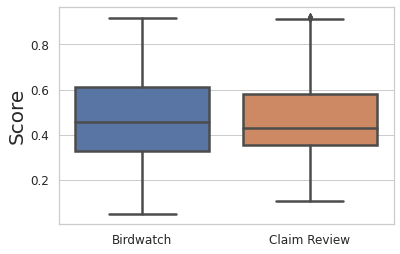

In [123]:
sns.set_theme(style="whitegrid")
plt.ylabel('Score',fontsize=20)
sns.boxplot(data=data,linewidth=2.5)
plt.tick_params(labelsize=12)
#plt.savefig('CheckWorth.png')
plt.show()